<a href="https://colab.research.google.com/github/malik-suhail/Steel-Industry-Energy-Consumption-Prediction/blob/main/Steel_Industry_Energy_Consumption_Classification_on_Load_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATASET IMPORT**

In [27]:

import kagglehub
csafrit2_steel_industry_energy_consumption_path = kagglehub.dataset_download('csafrit2/steel-industry-energy-consumption')

print('Data source import complete.')


Data source import complete.


# Summary

This notebook constitutes exploratory data analysis, data preprocessing and training of a classication model on load type of Steel Industry Energy Consumption dataset.

# 1. Library import

In [2]:
#Libraries we will use in the this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.stats import norm
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import plotly.express as px

# 2. Load Data  

In [55]:
df = pd.read_csv(csafrit2_steel_industry_energy_consumption_path + '/Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [56]:
#Drop the index column
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [57]:
#Rename some columns
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Reactive_Power_kVarh',
                        'Leading_Current_Reactive_Power_kVarh': 'Leading_Reactive_Power_kVarh',
                        'Lagging_Current_Power_Factor': 'Lagging_Power_Factor',
                        'Leading_Current_Power_Factor': 'Leading_Power_Factor',
                        'CO2(tCO2)':'CO2'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          35040 non-null  object 
 1   Usage_kWh                     35040 non-null  float64
 2   Lagging_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                           35040 non-null  float64
 5   Lagging_Power_Factor          35040 non-null  float64
 6   Leading_Power_Factor          35040 non-null  float64
 7   NSM                           35040 non-null  int64  
 8   WeekStatus                    35040 non-null  object 
 9   Day_of_week                   35040 non-null  object 
 10  Load_Type                     35040 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.9+ MB


In [58]:
#Check if there is missing value
df.isnull().sum().sort_values(ascending=False)

,0
date,0
Usage_kWh,0
Lagging_Reactive_Power_kVarh,0
Leading_Reactive_Power_kVarh,0
CO2,0
Lagging_Power_Factor,0
Leading_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0


No missing value in the dataset.

In [59]:
#Check the details for dates
df["date"].value_counts()

,count
date,
01/01/2018 00:15,1
01/09/2018 08:45,1
01/09/2018 07:15,1
01/09/2018 07:30,1
01/09/2018 07:45,1
...,...
02/05/2018 14:45,1
02/05/2018 14:30,1
02/05/2018 14:15,1


In [60]:
#count the value for load type
df["Load_Type"].value_counts()

,count
Load_Type,
Light_Load,18072
Medium_Load,9696
Maximum_Load,7272


# 3. Exploratory Data Analysis

In [61]:
 #Summary statistics of the database
df.describe()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [66]:
# Print out the correlation of the features
df.corr(numeric_only=True)

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Reactive_Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


In [81]:
fig = px.imshow(df.corr(numeric_only=True), text_auto=True,aspect="auto")
fig.update_layout(
    title=dict(text='Correlation Heatmap'))
fig.update_traces(texttemplate="%{z:.2f}")
fig.show()

We can see the correlation of the numeric values features. For example, Usage has high correlation with Lagging Reactive Power and CO2. Lagging Reative Power has high correlation with Usage and CO2.

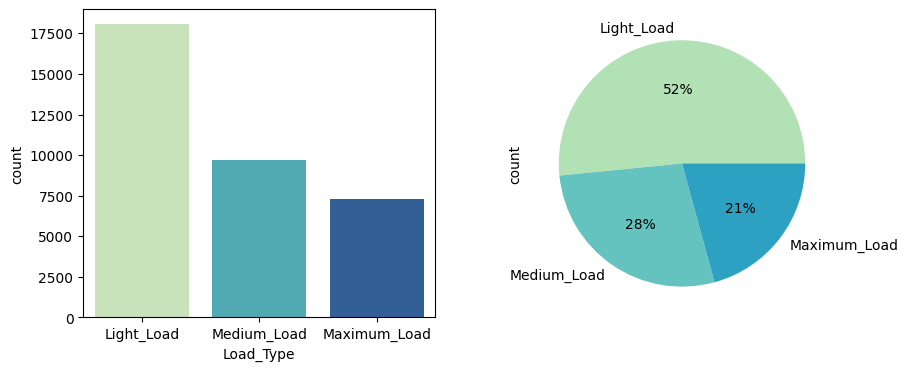

In [83]:
#Check target "Load_Type" distribution and %
fig, ax =plt.subplots(1,2, figsize=(10,4))

sns.countplot(data=df, x="Load_Type",palette = 'YlGnBu', ax=ax[0], hue="Load_Type" );

loadtype_count = df.Load_Type.value_counts()
color2 = sns.color_palette('YlGnBu')[1:5]
loadtype_count.plot(kind='pie' ,colors = color2, autopct='%1.0f%%' , ax=ax[1]);


fig.show()

We are see that the 'Light load type' has the highest contribution which contributed 52% of the total.

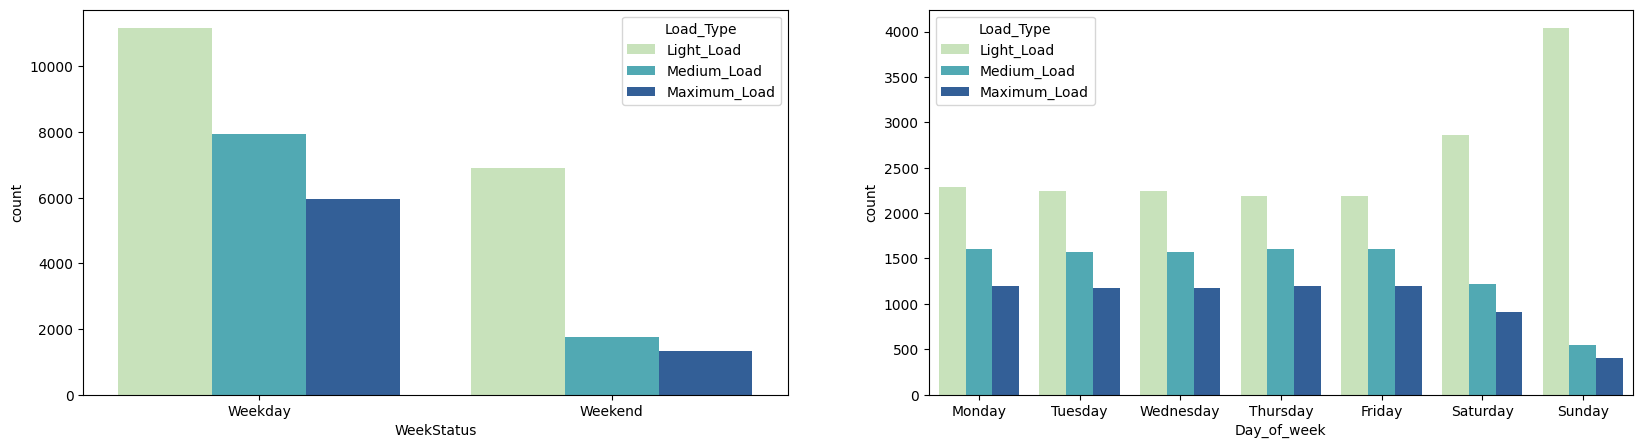

In [84]:
#Plot the categorical columns WeekStatus and Day_of_week and divided by Target - Load type

fig, ax =plt.subplots(1,2, figsize=(20,5))

sns.countplot(data=df, x="WeekStatus", hue="Load_Type",palette='YlGnBu', ax=ax[0])
sns.countplot(data=df, x="Day_of_week", hue="Load_Type",palette='YlGnBu', ax=ax[1])

fig.show()


'Light load type' has higher proportion on Weekends especially on Sunday.

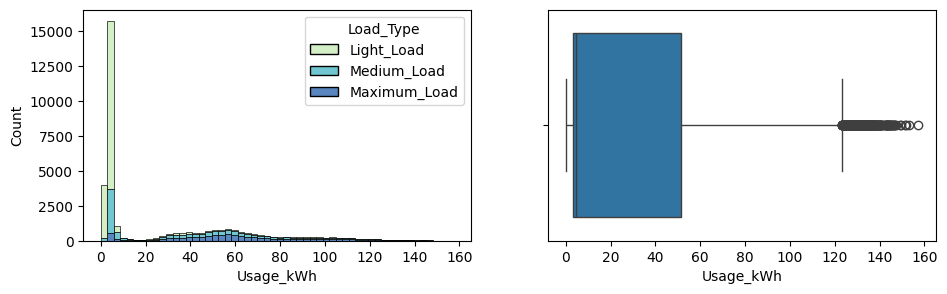

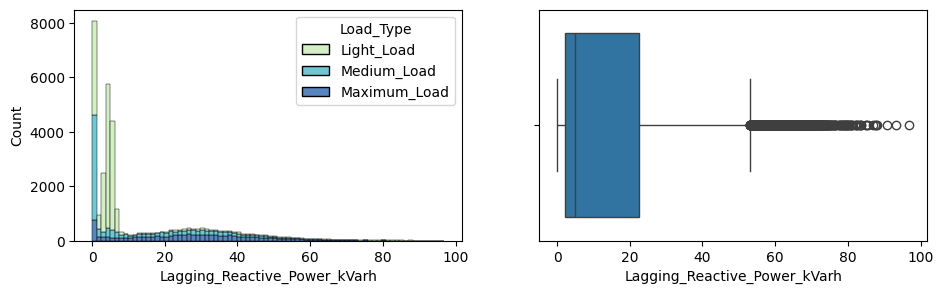

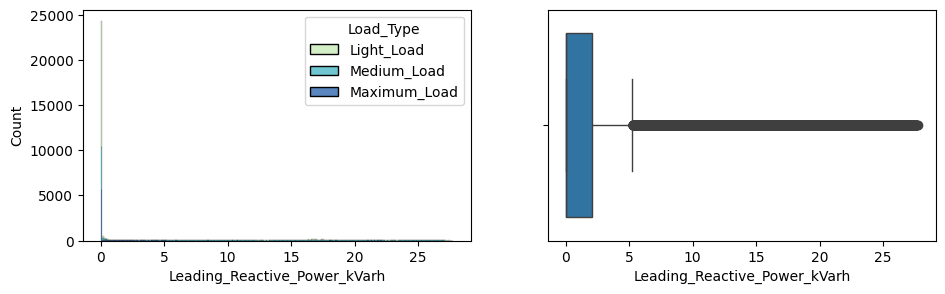

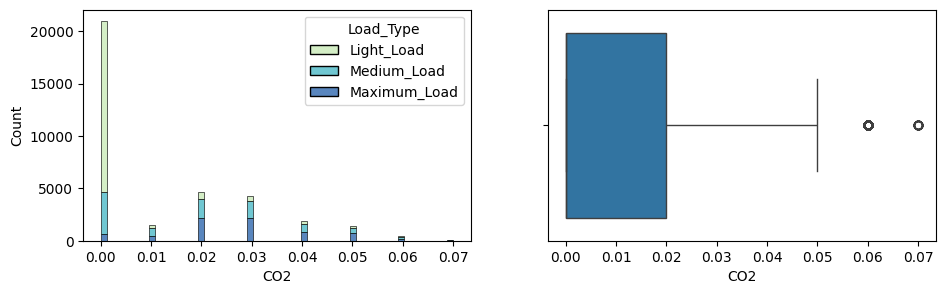

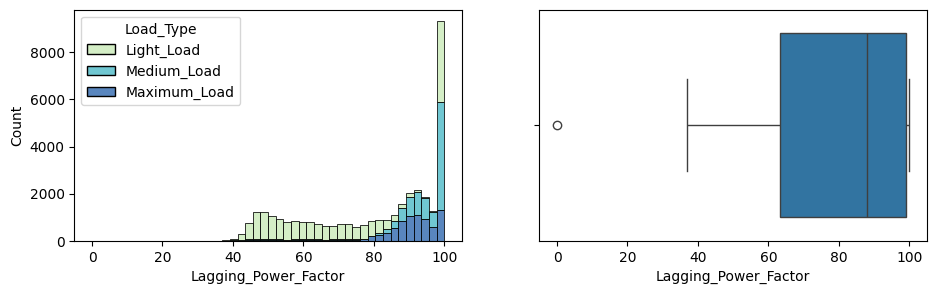

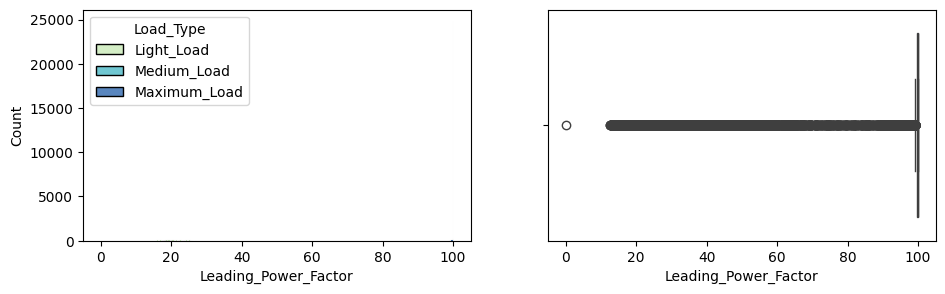

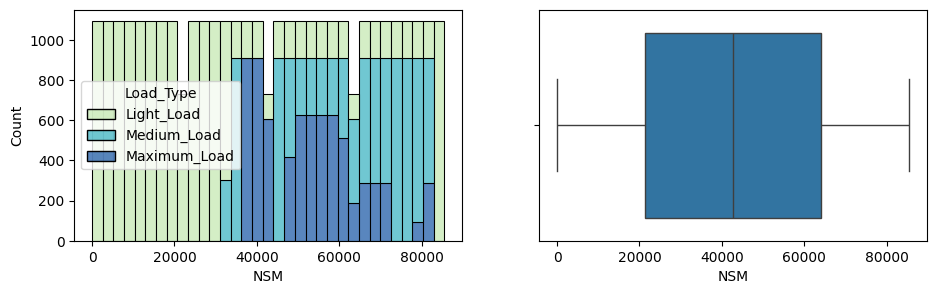

In [85]:
#Plot the numerical columns distribution and divided by Load_Type

numerical = df.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(11,3))
    sns.histplot(data=df, x=col, ax=ax[0],hue='Load_Type', palette='YlGnBu', multiple="stack")
    sns.boxplot(data=df, x=col, ax=ax[1])

The distribution charts above show the numberic values in the dataset. There are few insights we can draw.

Most energy consumption usages are below 4.5kWh, and more than 15000 records are between 2.5 and 4.5kWh.
Lagging Reactive Power are mainly below 10kVarh.
The majority of Lagging Reactive Power are at 0kVarh.
More than 15000 Light Load and half of Medium Load at 0.00 CO2.
The Lagging Power Factor mainly distributes between 40 to 100.
the Leading Power Factor only gathers at 100.
35000 NSM or below is Light Load. Between 35000 to 60000 NSM are contributed by Maximum Load, and from 60000 to 80000 are mainly from Medium Load.

In [89]:
# Usage kWh vs Lagging Reactive Power kVarh
fig1 = px.scatter(df, x='Usage_kWh', y='Lagging_Reactive_Power_kVarh',
                 title="Usage kWh vs Lagging Reactive Power kVarh")
fig1.update_traces(marker=dict(color='#808000'))

# Usage(kWh) vs Leading Reactive Power(kVarh)
fig2 = px.scatter(df, x='Usage_kWh', y='Leading_Reactive_Power_kVarh',
                 title="Usage(kWh) vs Leading Reactive Power(kVarh)")
fig2.update_traces(marker=dict(color='#B4C424'))

# Usage kWh vs Lagging Power Factor
fig3 = px.scatter(df, x='Usage_kWh', y='Lagging_Power_Factor',
                 title="Usage kWh vs Lagging Power Factor")
fig3.update_traces(marker=dict(color='#4F7942'))

# Usage(kWh) vs Leading Power Factor
fig4 = px.scatter(df, x='Usage_kWh', y='Leading_Power_Factor',
                 title="Usage(kWh) vs Leading Power Factor")
fig4.update_traces(marker=dict(color='#088F8F'))

fig1.show()
fig2.show()
fig3.show()
fig4.show()

The scatterplot at the top left shows a moderately strong and positive relationship of lagging reactive power and usage While the scatterplot at the right top shows a negative association between leading reactive power and usage.
The scatterplots in the buttom shows the relationship of usage vs lagging power factor and usage vs leading power factor which both do not show a very strong positive relation. However, we can still see that the high lagging or leading power, the usage are also high as well.


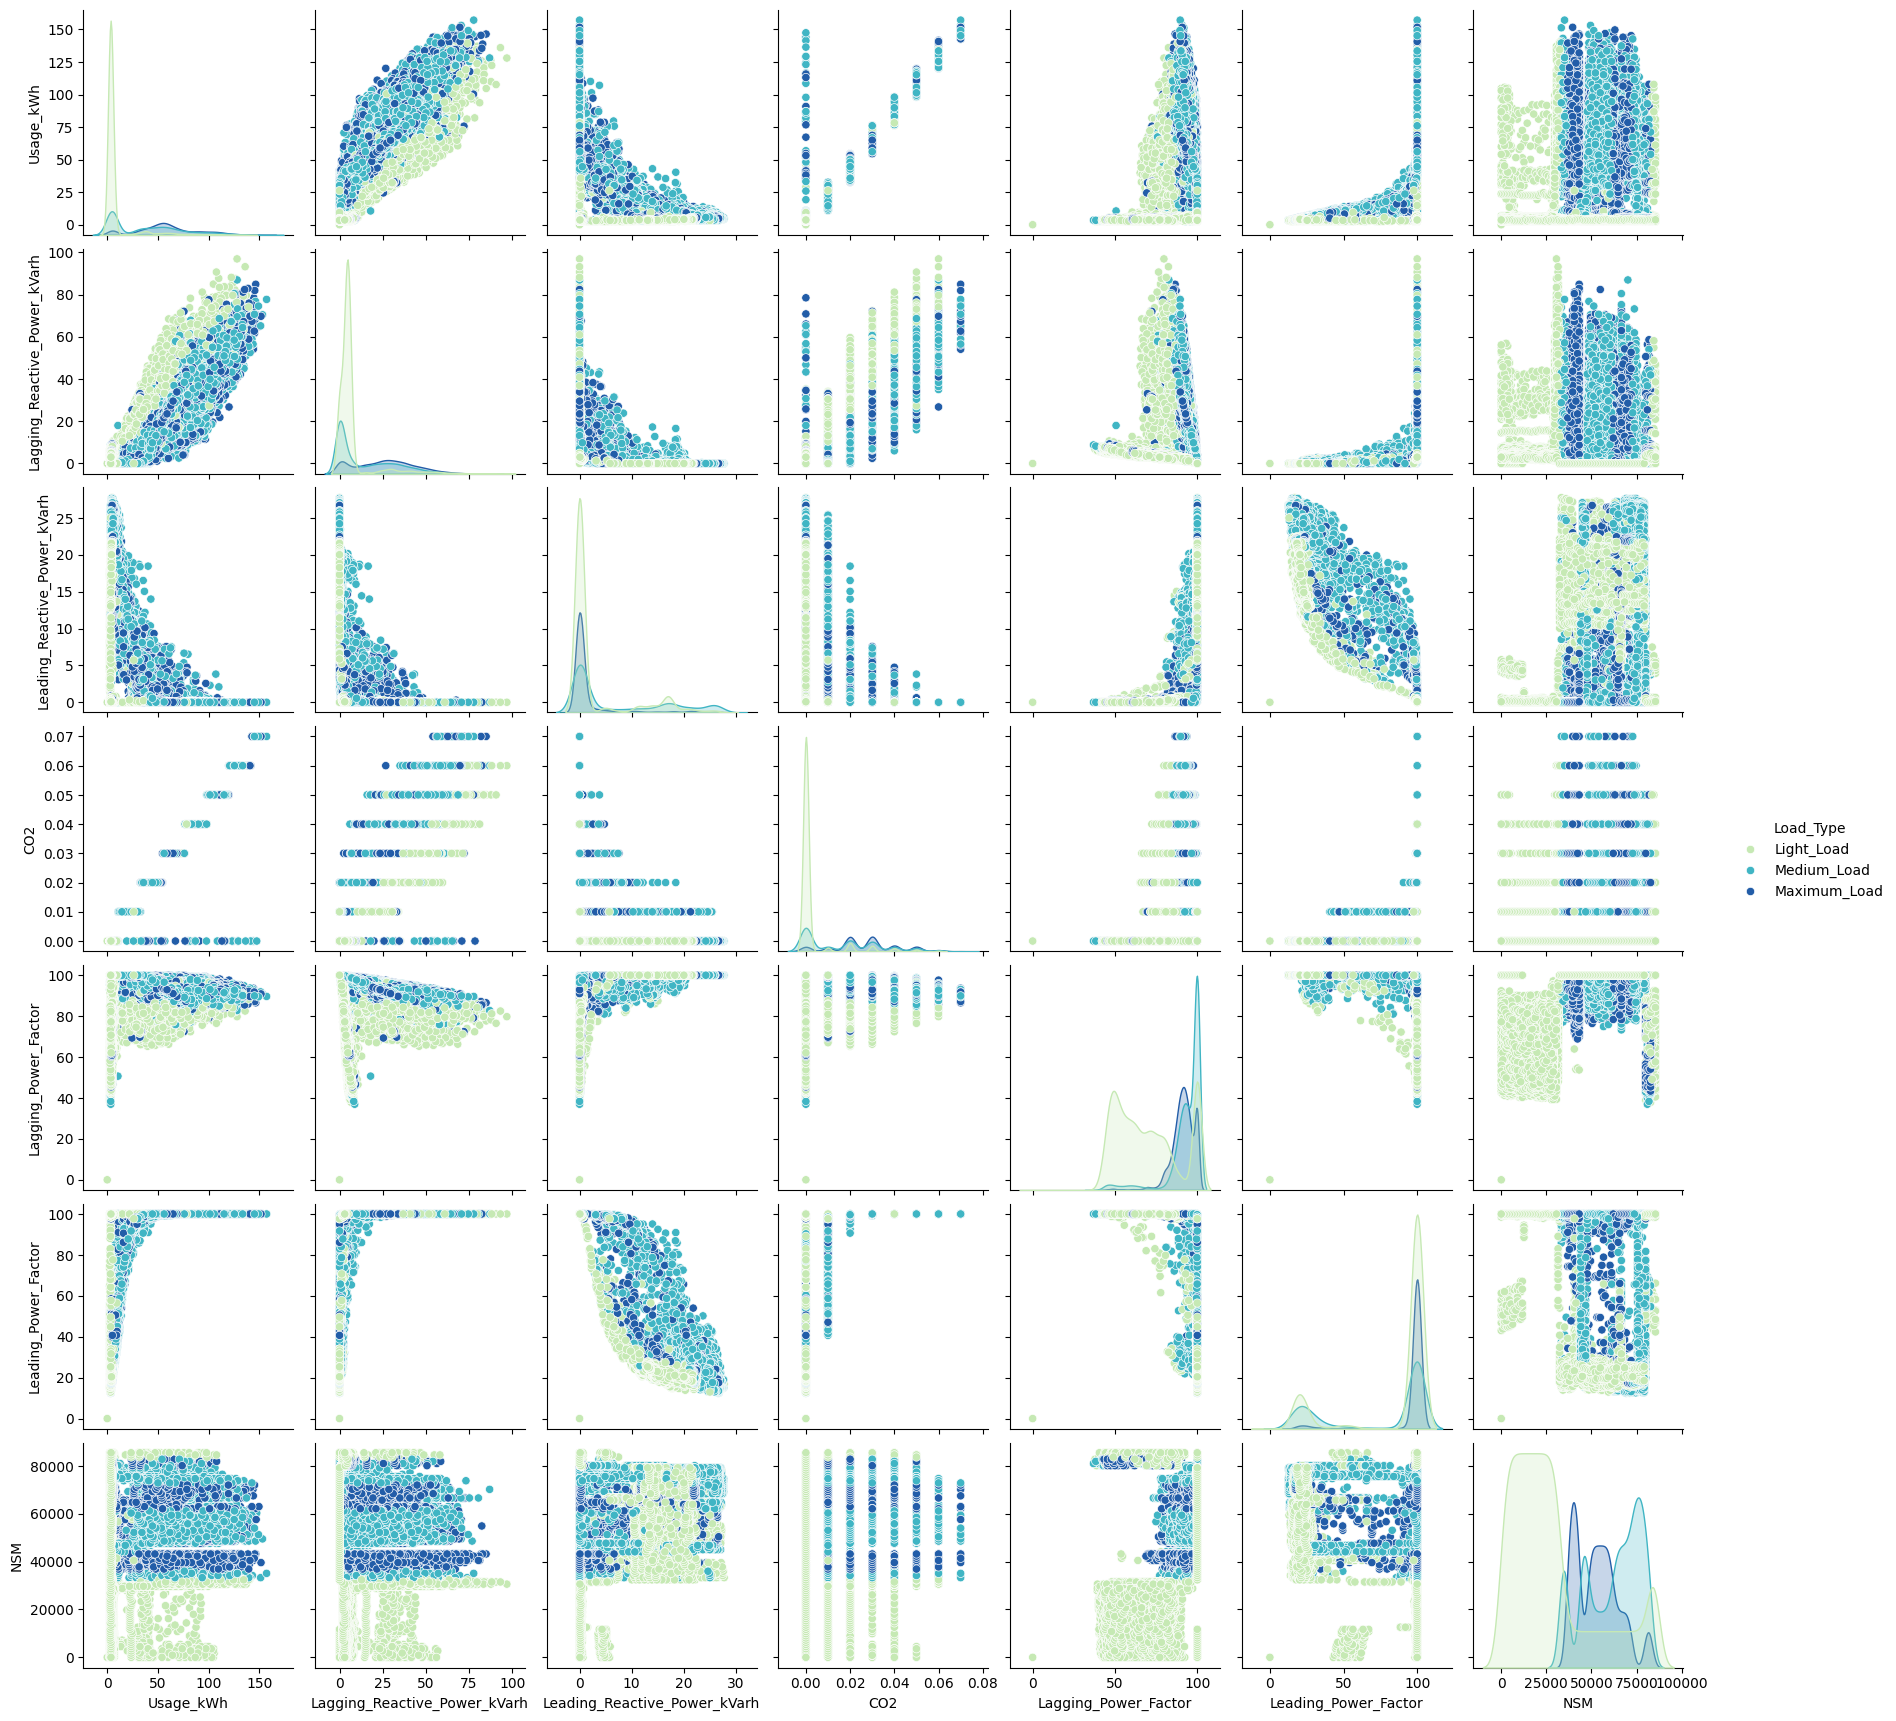

In [92]:
#Create the plot pairwise relationships in a dataset and split with load type

figsize=(24,12)
sns.pairplot(df, hue='Load_Type', palette='YlGnBu')

# 4. Data Transformation (dummy features)

In [93]:
# Encode Categorical Columns
categ = df.select_dtypes(include = "object").columns

le = preprocessing.LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

df.head()

,date,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0
1,2,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0
2,3,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0
3,4,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0
4,5,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0


In [94]:
#count the value for load type after LabelEncoder
df["Load_Type"].value_counts()

,count
Load_Type,
0,18072
2,9696
1,7272


By checking the value we can see that

0 = Light Load

2 = Medium Load  

1 = Maximum Load

In [95]:
#check the correlation
df.corr()

,date,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,1.000000,-0.011093,-0.013170,-0.013660,-0.003346,0.024473,0.005546,2.739577e-03,-8.928788e-03,7.891603e-03,0.015578
Usage_kWh,-0.011093,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,2.346103e-01,-2.954748e-01,3.986516e-02,0.444092
Lagging_Reactive_Power_kVarh,-0.013170,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,8.266237e-02,-3.198698e-01,4.377958e-02,0.249674
Leading_Reactive_Power_kVarh,-0.013660,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,3.716046e-01,2.604306e-01,-1.978464e-02,0.223557
CO2,-0.003346,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,2.317260e-01,-2.904670e-01,3.623573e-02,0.437742
Lagging_Power_Factor,0.024473,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,5.652695e-01,5.408210e-02,1.597357e-03,0.559395
Leading_Power_Factor,0.005546,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-3.605630e-01,-3.146749e-01,2.110457e-02,-0.131382
NSM,0.002740,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000e+00,-9.027984e-17,-4.015553e-17,0.593049
WeekStatus,-0.008929,-0.295475,-0.319870,0.260431,-0.290467,0.054082,-0.314675,-9.027984e-17,1.000000e+00,-1.560818e-01,-0.203308
Day_of_week,0.007892,0.039865,0.043780,-0.019785,0.036236,0.001597,0.021105,-4.015553e-17,-1.560818e-01,1.000000e+00,0.012682


In [96]:
#drop date as it has low correlation

df1 = df.drop('date', axis='columns')
df1.shape

(35040, 10)

In [102]:
fig = px.imshow(df1.corr().sort_values(by=['Load_Type'],ascending=False), text_auto=True,aspect="auto")
fig.update_layout(
    title=dict(text='Correlation Heatmap'))
fig.update_traces(texttemplate="%{z:.1f}")
fig.show()

After the catergorical columns change to numbers, we can see the correlation of Load Type with other values.

# 5. Prepare the features and target variable

## Split the dataset and prepare some lists to store the models


In [103]:
# Split the dataset and prepare some lists to store the models

X = df1.drop(['Load_Type'], axis=1)
y = df1.Load_Type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

# 6. Create a pipeline

### Train Various Classification Models

In [104]:
#Get the columns name
df1.drop(columns=["Load_Type"]).select_dtypes('number').columns.tolist()

['Usage_kWh',
 'Lagging_Reactive_Power_kVarh',
 'Leading_Reactive_Power_kVarh',
 'CO2',
 'Lagging_Power_Factor',
 'Leading_Power_Factor',
 'NSM',
 'WeekStatus',
 'Day_of_week']

In [105]:
#Specify Numerical and Categorical Columns for preprocessor
numerical_features = ['Usage_kWh','Lagging_Reactive_Power_kVarh','Leading_Reactive_Power_kVarh',
                      'CO2','Lagging_Power_Factor','Leading_Power_Factor','NSM']
passthrough_features = ['WeekStatus','Day_of_week']

#Prepare preprocessor
preprocessor = make_column_transformer(
    (make_pipeline(StandardScaler()),numerical_features,),
    ("passthrough", passthrough_features),)

#Loop for the training model
models = []

names = [
    "Logistic Regression",
    "KNN",
    "Linear SVC / SVM Linear",
    "SVM RBF",
    "Decision Tree",
    "Naive Bayes",
    "Random Forest",
]

scores = []
clf = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=1),
    SVC(kernel="rbf", gamma=1, C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    RandomForestClassifier(n_estimators=200, max_leaf_nodes=16)
]

for model in clf:

    pipe = make_pipeline(preprocessor, model)
    pipe.fit(X_train, y_train)
    print(model)
    score = pipe.score(X_test, y_test)
    scores.append(score)
    print("Model score: %.3f" %score)
    print("\n-------------------------\n")

scores_df = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy'])

LogisticRegression()
Model score: 0.756

-------------------------

KNeighborsClassifier(n_neighbors=3)
Model score: 0.851

-------------------------

SVC(C=1, kernel='linear')
Model score: 0.770

-------------------------

SVC(C=1, gamma=1)
Model score: 0.846

-------------------------

DecisionTreeClassifier(max_depth=5)
Model score: 0.854

-------------------------

GaussianNB()
Model score: 0.703

-------------------------

RandomForestClassifier(max_leaf_nodes=16, n_estimators=200)
Model score: 0.857

-------------------------



# 7. Select the best pipe

In [106]:
#List the classifier and their accuracy
scores_df.sort_values(by=['Accuracy'], ascending=[False])

,Classifier,Accuracy
6,Random Forest,0.857420
4,Decision Tree,0.854224
1,KNN,0.850913
3,SVM RBF,0.846119
2,Linear SVC / SVM Linear,0.770320
0,Logistic Regression,0.755936
5,Naive Bayes,0.702740


Random Forest has the highest accuracy.

### Grid Search with CV

In [107]:
#Grid search implementation
from sklearn.model_selection import GridSearchCV

n_estimators=[64,100,128,200]
max_features= [2,4,6,9]
bootstrap = [True,False]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
Va

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 4, 6, 9],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [108]:
print("Results from Grid Search" )
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)

Results from Grid Search

 The best estimator across ALL searched params:
 RandomForestClassifier(max_features=4, n_estimators=128, oob_score=True)

 The best score across ALL searched params:
 0.9123668188736682

 The best parameters across ALL searched params:
 {'bootstrap': True, 'max_features': 4, 'n_estimators': 128, 'oob_score': True}


In [109]:
#This is the classification model with the best parameters
grid

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 4, 6, 9],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [110]:
#Predict the result

y_pred = grid.predict(X_test)
print(y_pred)

[0 1 1 ... 2 0 0]


# 8. Evaluation of XGboost

#### Confusion Matrix

In [112]:
confusion_matrix(y_test, y_pred)

array([[4415,   12,   69],
       [  22, 1550,  292],
       [  81,  295, 2024]])

<Axes: xlabel='Predicted', ylabel='Actual'>

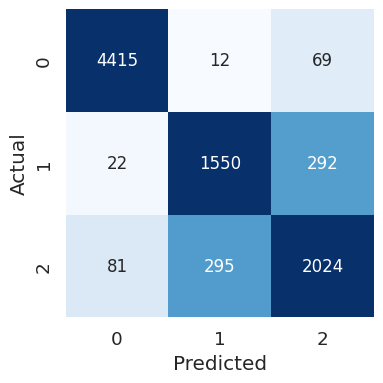

In [111]:
%matplotlib inline
#Draw the confusion matrix with the prediction and actual values

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size

sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap='Blues')

# 9. Classification Report

In [114]:
#Build a text report table showing the main classification metrics and its accuracy

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4496
           1       0.83      0.83      0.83      1864
           2       0.85      0.84      0.85      2400

    accuracy                           0.91      8760
   macro avg       0.89      0.89      0.89      8760
weighted avg       0.91      0.91      0.91      8760

